# # Assignment 3 - Chapter 3: Reproducible Research (Insight-as-a-Code)

Customer 360 Degree View Dataset Using Case Study: Brazilian E-Commerce Public Dataset by Olist

> Name: Latifah Hukma S

> ID: DS03083

# List Feature Yang Dibuat
Berikut merupakan fitur baru yang dibuat. Untuk penjelasan lebih lanjut, lihat **Conclusion Feature** di halaman paling bawah

1. order_count
2. approved
3. canceled
4. created
5. delivered
6. invoiced
7. processing
8. shipped
9. unavailable
10. total_items
11. total_prices
12. total_freight_value
13. pay_boleto
14. pay_credit_card
15. pay_debit_card
16. pay_not_defined
17. pay_voucher
18. boleto_freq
19. credit_card_freq
20. debit_card_freq
21. not_defined_freq
22. voucher_freq
23. morning
24. noon
25. evening
26. night
27. midnight
28. beginning_month
29. middle_month
30. end_month
31. fav_category_product


# 1 Import & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# import geoviews as gv
# import geoviews.tile_sources as gvts
# from geoviews import dim, opts
# gv.extension('bokeh')

In [2]:
cust = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
geo = pd.read_csv('../input/brazilian-ecommerce/olist_geolocation_dataset.csv')
items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
cat = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

# 2 Exploratory Data Analysis

In [3]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
cust.describe(include=object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [6]:
cust.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [10]:
geo.describe(include=object)

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


In [11]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
items.iloc[:,5:].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [14]:
items.iloc[:,4:].describe(include=object)

,shipping_limit_date
count,112650
unique,93318
top,2017-07-21 18:25:23
freq,21


In [15]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
payments.describe(include=object)

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [20]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [24]:
reviews.iloc[:,2:].describe(include=object)

,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,11568,40977,99224,99224
unique,4527,36159,636,98248
top,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,423,230,463,4


In [25]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders.iloc[:,2:].describe()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99281,97658,96476,99441
unique,8,98875,90733,81018,95664,459
top,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,96478,3,9,47,3,522


In [29]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [33]:
products.iloc[:,1:].describe(include=object)

,product_category_name
count,32341
unique,73
top,cama_mesa_banho
freq,3029


In [34]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [36]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
sellers.iloc[:,2:].describe()

,seller_city,seller_state
count,3095,3095
unique,611,23
top,sao paulo,SP
freq,694,1849


In [38]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [39]:
cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [40]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [41]:
cat.describe(include=object)

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [42]:
cat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

# 2.1 Perbandingan Customer Repurchased vs Tidak

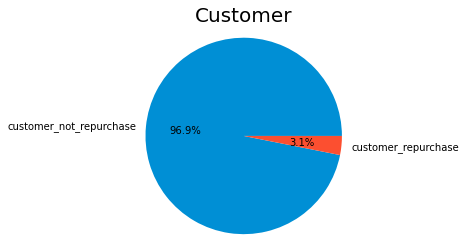

In [43]:
# menghitung total customer asli
unique = cust['customer_unique_id'].value_counts()

# menghitung total customer asli yang melakukan repurchase
repurchase = unique[unique > 1]

# menghitung total customer asli yang melakukan tidak repurchase
buy_one = unique[unique == 1]

# memplot perbandingan customer yang melakukan repurchased dengan yang tidak
labels = ['customer_not_repurchase', 'customer_repurchase']
data = [buy_one.size, repurchase.size]

plt.title(label="Customer", fontsize=20)
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

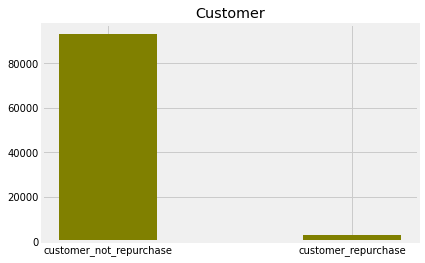

In [44]:
plt.bar(labels, data, color ='olive', width = 0.4)
plt.title("Customer")
plt.show()

<font size="4">Tampak bahwa **dari total seluruh customer, hanya 3.1% yang melakukan repurchase** product. Dengan kata lain, dari 96096 customer, terdapat 2997 customer yang melakukan pembelian kembali di store, sedangkan sisanya tidak.</font>

# 2.2 Persebaran Lokasi Customer

<AxesSubplot:title={'center':'Top 20 Kota Tujuan Order Terbanyak'}>

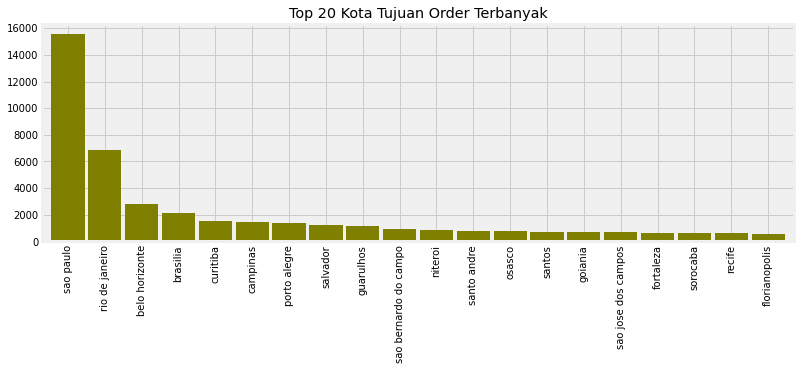

In [45]:
a = cust['customer_city'].value_counts().head(20)

a.plot(kind='bar', color='olive', width=0.9, figsize=(12,4), title='Top 20 Kota Tujuan Order Terbanyak', grid=True)

<font size="4">Grafik di atas merupakan data 20 kota yang memiliki total order terbanyak. **Kota Sao Paulo menempati posisi pertama** sebagai kota dengan jumlah order customer terbanyak, yakni mendekati 16000 order. Di posisi kedua terdapat Kota Rio de Janeiro dengan total order mendekati 7000 order, sedangkan di posisi ketiga terdapat Kota Belo Horizonte. Dengan kata lain, **masyarakat Kota Sao Paulo lebih sering melakukan kegiatan belanja di marketplace e-commerce dibandingkan masyarakat kota lain di Brazil**.</font>

# 2.3 Product Terlaris

<AxesSubplot:title={'center':'Top 10 Kategori Product dengan Penjualan Terbanyak'}, xlabel='product_category_name_english'>

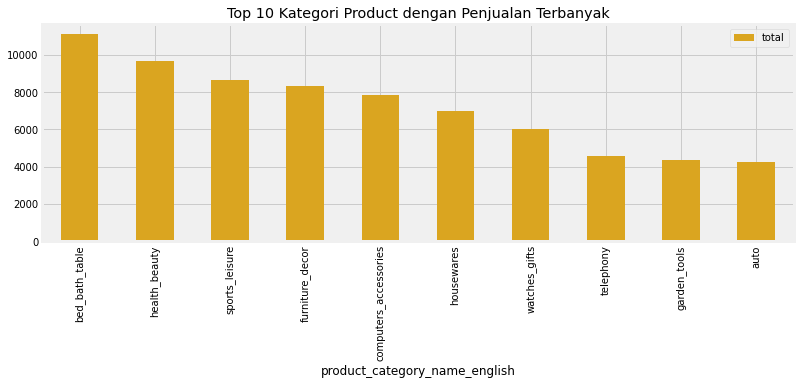

In [46]:
# mengambil total product yang terjual
items_sold = items[['product_id']].value_counts().rename_axis('product_id').reset_index(name='total')

# merging total product dengan kategorinya
product_items_sold = items_sold.merge(products, on='product_id')
product_items_sold = product_items_sold.iloc[:,:3]
total_items_sold = product_items_sold.merge(cat, on='product_category_name')

# menjumlahkan total masing-masing kategori yang terjual
total_items_sold_eng = total_items_sold.groupby('product_category_name_english').sum().sort_values(by='total', ascending=False)

# plot top 10 kategori product yang terlaris
total_items_sold_eng.head(10).plot(kind='bar', 
                                   color='goldenrod', 
                                   width=0.5, 
                                   figsize=(12,4), 
                                   title='Top 10 Kategori Product dengan Penjualan Terbanyak', 
                                   grid=True)

# 3 Feature Engineering

# 3.1 Total Seluruh Order Tiap Customer

In [47]:
# total order dari masing-masing customer
cust_orders_merge = orders.merge(cust, on='customer_id')

cust_orders_freq = cust_orders_merge.iloc[:,[0,8]]
cust_orders_freq = cust_orders_freq.groupby('customer_unique_id').count().reset_index()
cust_orders_freq = cust_orders_freq.rename({
    'order_id' : 'orders_count'
}, axis='columns')

cust_orders_freq.sort_values(by='orders_count', ascending=False).head()

,customer_unique_id,orders_count
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7


# 3.2 Total Pemrosesan Order Masing-Masing Customer

In [48]:
# ambil total status order masing-masing customer
cust_orders_status = cust_orders_merge.iloc[:,[0,2,8]].groupby(['customer_unique_id','order_status']).count().reset_index()

# buat feature baru
cust_orders_status = cust_orders_status.pivot_table('order_id', ['customer_unique_id'], 'order_status')

# handling NaN
cust_orders_status = cust_orders_status.fillna(0)

# showing dataframe
cust_orders_status = cust_orders_status.rename_axis(None, axis=1).reset_index()
cust_orders_status.sort_values(by='delivered', ascending=False).head()

,customer_unique_id,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
52973,8d50f5eadf50201ccdcedfb9e2ac8455,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0
23472,3e43e6105506432c953e165fb2acf44c,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
37797,6469f99c1f9dfae7733b25662e7f1782,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
76082,ca77025e7201e3b30c44b472ff346268,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0


# 3.3 Total Items Yang Diorder Tiap Customer

In [49]:
# ambil seluruh items yang diorder customer
cek_items = items.iloc[:,[0,2,5,6]]
cek_items

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72


In [50]:
# ambil jumlah item dalam 1 kali order
cek_freq_item = cek_items[['order_id']].value_counts().rename_axis('order_id').reset_index(name='total_items')

# merging dengan orders dan cust
cek_items_a = cek_items.merge(orders, on='order_id')
cek_items_a = cek_items_a.iloc[:,:5]

cek_items_b = cek_items_a.merge(cust, on='customer_id')
cek_items_b = cek_items_b.iloc[:,:6]

# merging total prices, total freight, total items, dan total orders masing-masing customer
cek_items_b = cek_items_b.groupby(['customer_unique_id','order_id']).sum().reset_index()
total_items = cek_items_b.merge(cek_freq_item, on='order_id')
total_items_prices = total_items.groupby(['customer_unique_id']).sum().reset_index()

# rename columns
total_items_prices = total_items_prices.rename({
    'price' : 'total_prices',
    'freight_value' : 'total_freight_value'
}, axis='columns') 

# change columns position
total_items_prices = total_items_prices[['customer_unique_id', 'total_items', 'total_prices', 'total_freight_value']]

total_items_prices.sort_values(by='total_items', ascending=False).head()

,customer_unique_id,total_items,total_prices,total_freight_value
74752,c8460e4251689ba205045f3ea17884a1,24,4080.00,575.88
25885,4546caea018ad8c692964e3382debd19,21,31.80,164.37
73155,c402f431464c72e27330a67f7b94d4fb,20,2000.00,202.40
39443,698e1cf81d01a3d389d96145f7fa6df8,20,1974.00,288.80
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18,1252.35,292.47


# 3.4 Total Orders Berhasil Tiap Customer

In [51]:
# ambil total order masing-masing customer
total_orders = cek_items_b[['order_id','customer_unique_id']].groupby('customer_unique_id').count().rename_axis('customer_unique_id').reset_index()

total_orders = total_orders.rename({'order_id': 'total_orders_success'}, axis='columns') 
total_orders.sort_values(by='total_orders_success', ascending=False)

,customer_unique_id,total_orders_success
52597,8d50f5eadf50201ccdcedfb9e2ac8455,16
23302,3e43e6105506432c953e165fb2acf44c,9
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37532,6469f99c1f9dfae7733b25662e7f1782,7
75560,ca77025e7201e3b30c44b472ff346268,7
...,...,...
32272,5657f9f721c16800a66c21081d46b18d,1
32271,5657dfebff5868c4dc7e8355fea865c4,1
32270,5657596addb4d7b07b32cd330614bdf8,1
32269,5656eb169546146caeab56c3ffc3d268,1


# 3.5 Total Order serta Item Tiap Customer

In [52]:
total_items_prices_orders = total_orders.merge(total_items_prices, on='customer_unique_id')
total_items_prices_orders[total_items_prices_orders['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']
total_items_prices_orders.sort_values(by='total_orders_success', ascending=False).head()

,customer_unique_id,total_orders_success,total_items,total_prices,total_freight_value
52597,8d50f5eadf50201ccdcedfb9e2ac8455,16,16,729.62,172.42
23302,3e43e6105506432c953e165fb2acf44c,9,14,1000.85,171.82
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7,9,809.21,149.80
37532,6469f99c1f9dfae7733b25662e7f1782,7,9,664.20,94.63
75560,ca77025e7201e3b30c44b472ff346268,7,12,806.61,316.11


# 3.6 Waktu Purchase Tiap Customer (Time)

In [53]:
cust_orders = orders.iloc[:,[1,3]].merge(cust, on='customer_id')
cust_orders = cust_orders.iloc[:,:3]

# ambil waktunya
cust_orders['purchase_time'] = cust_orders['order_purchase_timestamp'].str.split().str.get(1)
cust_orders['purchase_time'] = cust_orders['purchase_time'].str.split(':').str.get(0)
cust_orders['purchase_time'] = cust_orders['purchase_time'].astype(int)

# menentukan waktu
def func(row):
    if row['purchase_time'] >= 6 and row['purchase_time'] < 12:
        return 'morning'
    elif row['purchase_time'] >= 12 and row['purchase_time'] < 16:
        return 'noon'
    elif row['purchase_time'] >= 16 and row['purchase_time'] < 19:
        return 'evening'
    elif row['purchase_time'] >= 19 and row['purchase_time'] < 24:
        return 'night'
    else:
        return 'midnight'

cust_orders['purchase_time'] = cust_orders.apply(func, axis=1)

cust_orders.head()

,customer_id,order_purchase_timestamp,customer_unique_id,purchase_time
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,morning
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,night
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,morning
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,night
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,night


In [54]:
# ambil frequency waktu purchase masing-masing customer
cust_orders_time = cust_orders[['customer_unique_id','purchase_time','customer_id']].groupby(['customer_unique_id','purchase_time']).count().reset_index()

# buat feature baru
cust_orders_time = cust_orders_time.pivot_table('customer_id', ['customer_unique_id'], 'purchase_time')

# handling NaN
cust_orders_time = cust_orders_time.fillna(0)

# showing dataframe
cust_orders_time = cust_orders_time.rename_axis(None, axis=1).reset_index()
cust_orders_time = cust_orders_time[['customer_unique_id','morning','noon','evening','night','midnight']]
cust_orders_time.sort_values(by='night', ascending=False).head()

,customer_unique_id,morning,noon,evening,night,midnight
52973,8d50f5eadf50201ccdcedfb9e2ac8455,1.0,1.0,1.0,14.0,0.0
43934,74cb1ad7e6d5674325c1f99b5ea30d82,0.0,0.0,0.0,4.0,1.0
43352,732d307839b02bc2d3a4c26b515ea2b9,0.0,0.0,0.0,3.0,0.0
58920,9cc5a07f169a1606fd347a56683e6ea6,0.0,0.0,0.0,3.0,1.0
70413,bb58670190dba4e9b320f84cb98317a3,0.0,0.0,0.0,3.0,0.0


<font size="4">Data di atas merupakan persebaran waktu pembelian masing-masing customer. Waktu terbagi menjadi morning, noon, evening, night, dan midnight, dengan ketentuan sebagai berikut</font>

    morning  = 06:00 - 12:00
    noon     = 12:00 - 15:00
    evening  = 15:00 - 18:00
    night    = 18:00 - 23:00
    midnight = 23:00 - 06:00

## 3.6.1 Sebaran Waktu Purchase Seluruh Customer (Time)

In [55]:
cust_time_purchase = cust_orders[['customer_id','purchase_time']].groupby('purchase_time').count()
cust_time_purchase.sort_values(by='customer_id', ascending=False)

,customer_id
purchase_time,
night,28331
noon,25536
morning,22240
evening,18594
midnight,4740


<font size="4">Mayoritas customer membeli pada saat malam hari, yakni antara jam 18:00 - 23:00</font>

# 3.7 Waktu Purchase Tiap Customer (Month)

In [56]:
cust_orders_date = cust_orders.iloc[:,:3]

# ambil tanggalnya
cust_orders_date['purchase_date'] = cust_orders_date['order_purchase_timestamp'].str.split().str.get(0)
cust_orders_date['purchase_date'] = cust_orders_date['purchase_date'].str.split('-').str.get(2)
cust_orders_date['purchase_date'] = cust_orders_date['purchase_date'].astype(int)

# menentukan waktu
def func(row):
    if row['purchase_date'] <= 10:
        return 'beginning_month'
    elif row['purchase_date'] > 10 and row['purchase_date'] <= 20:
        return 'middle_month'
    else:
        return 'end_month'

cust_orders_date['purchase_date'] = cust_orders_date.apply(func, axis=1)

cust_orders_date.head()

,customer_id,order_purchase_timestamp,customer_unique_id,purchase_date
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,beginning_month
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,end_month
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,beginning_month
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,middle_month
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,middle_month


In [57]:
# ambil frequency waktu (tanggal_bulan) purchase masing-masing customer
cust_orders_month = cust_orders_date[['customer_unique_id','purchase_date','customer_id']].groupby(['customer_unique_id','purchase_date']).count().reset_index()

# buat feature baru
cust_orders_month = cust_orders_month.pivot_table('customer_id', ['customer_unique_id'], 'purchase_date')

# handling NaN
cust_orders_month = cust_orders_month.fillna(0)

# showing dataframe
cust_orders_month = cust_orders_month.rename_axis(None, axis=1).reset_index()
cust_orders_month = cust_orders_month[['customer_unique_id','beginning_month','middle_month','end_month']]
cust_orders_month.sort_values(by='middle_month', ascending=False).head()

,customer_unique_id,beginning_month,middle_month,end_month
52973,8d50f5eadf50201ccdcedfb9e2ac8455,4.0,7.0,6.0
23472,3e43e6105506432c953e165fb2acf44c,3.0,5.0,1.0
3966,0a61b571f594b6919601bcf3380da7f7,0.0,3.0,0.0
21578,394ac4de8f3acb14253c177f0e15bc58,1.0,3.0,1.0
21638,397b44d5bb99eabf54ea9c2b41ebb905,1.0,3.0,0.0


<font size="4">Data di atas merupakan persebaran waktu pembelian masing-masing customer (dalam periode bulan). Waktu terbagi menjadi beginning_month, middle_month, end_month, dengan ketentuan sebagai berikut</font>

    beginning_month  = tanggal 1 - 10
    middle_month     = tanggal 11 - 20
    end_month        = tanggal 21 - 31
    


# 3.8 Freq Metode Pembayaran Tiap Customer Yang Order

In [58]:
# merging dengan data cust
cust_payments = payments.iloc[:,[0,2]].merge(orders, on='order_id')
cust_payments = cust_payments.iloc[:,:3]

# ambil frequency metode pembayaran masing-masing order
cust_payments = cust_payments[['order_id','payment_type','customer_id']].groupby(['customer_id','payment_type']).count().reset_index()

# buat feature baru
cust_payments = cust_payments.pivot_table('order_id', ['customer_id'], 'payment_type')

# handling NaN
cust_payments = cust_payments.fillna(0)

# showing dataframe
cust_payments = cust_payments.rename_axis(None, axis=1).reset_index()
cust_payments = cust_payments.merge(cust, on='customer_id')
cust_payments = cust_payments.iloc[:,:7]
cust_payments = cust_payments.groupby('customer_unique_id').sum().reset_index()

# rename columns
cust_payments = cust_payments.rename({
    'boleto' : 'boleto_freq',
    'credit_card' : 'credit_card_freq',
    'debit_card' : 'debit_card_freq',
    'not_defined' : 'not_defined_freq',
    'voucher' : 'voucher_freq'
}, axis='columns') 

cust_payments = cust_payments[['customer_unique_id','boleto_freq','credit_card_freq','debit_card_freq','voucher_freq','not_defined_freq']]
cust_payments.head()

,customer_unique_id,boleto_freq,credit_card_freq,debit_card_freq,voucher_freq,not_defined_freq
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,0.0,0.0


In [59]:
# merging dengan data cust
cust_payments_all = payments.iloc[:,[0,2]].merge(orders, on='order_id')

# cek orderan yang sudah selesai proses pembayaran
print("total order yang telah melakukan pembayaran =", cust_payments_all['customer_id'].value_counts().size)
print("total order yang masuk =", cust['customer_id'].value_counts().size)

total order yang telah melakukan pembayaran = 99440
total order yang masuk = 99441


<font size="4">Tampak bahwa ada 1 orderan yang belum menyelesaikan pembayaran</font>

## 3.8.1 Sebaran Metode Pembayaran Seluruh Order

In [60]:
payments['payment_type'].value_counts().to_frame()

,payment_type
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


<font size="4">Credit card merupakan metode pembayaran yang paling banyak dipilih customer dalam melakukan proses pembayaran</font>

# 3.9 Total Pengeluaran Tiap Metode Pembayaran Masing-Masing Customer

In [61]:
cek_payments = payments.iloc[:,[0,2,4]]

payment_orders = cek_payments.groupby(['order_id','payment_type']).sum().reset_index()

# buat feature baru
payment_orders = payment_orders.pivot_table('payment_value', ['order_id'], 'payment_type')

# handling NaN
payment_orders = payment_orders.fillna(0)

# showing dataframe
payment_orders = payment_orders.rename_axis(None, axis=1).reset_index()
# payment_orders.sort_values(by='night', ascending=False).head()

# rename columns
payment_orders = payment_orders.rename({
    'boleto' : 'pay_boleto',
    'credit_card' : 'pay_credit_card',
    'debit_card' : 'pay_debit_card',
    'not_defined' : 'pay_not_defined',
    'voucher' : 'pay_voucher'
}, axis='columns') 

# merge jumlah pengeluaran masing2 order dengan orders
payment_orders_val = payment_orders.merge(orders, on='order_id')
payment_orders_val = payment_orders_val.iloc[:,:7]

# merge dengan customer untuk mengetahui jumlah pengeluaran masing2 order tiap customer
cust_payment_orders = payment_orders_val.merge(cust, on='customer_id')
cust_payment_orders = cust_payment_orders.iloc[:,:8]
cust_payment_orders_val = cust_payment_orders.groupby('customer_unique_id').sum().reset_index()
cust_payment_orders_val = cust_payment_orders_val[['customer_unique_id', 'pay_boleto', 'pay_credit_card', 'pay_debit_card','pay_voucher','pay_not_defined']]
cust_payment_orders_val.head()

,customer_unique_id,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,pay_not_defined
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,141.90,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,27.19,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,86.22,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,43.62,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,196.89,0.0,0.0,0.0


# 3.10 Kategori Product Paling Sering Diorder Masing-Masing Customer

In [62]:
# mengambil orderan customer
cust_order = cust.merge(orders, on='customer_id')
cust_order = cust_order.iloc[:,[1,5]]

# mengambil item yang diorder
item_order = cust_order.merge(items, on='order_id')
item_order = item_order.iloc[:,[0,1,3]]

# mengambil nama kategori productnya
item_order_cat = item_order.merge(products, on='product_id')
item_order_cat = item_order_cat.iloc[:,:4]
item_cat = item_order_cat.merge(cat, on='product_category_name', how='outer')

# ambil kategori product terfavorit masing-masing customer 
item_cat = item_cat.groupby('customer_unique_id')['product_category_name_english'].agg(pd.Series.mode).to_frame().reset_index()
item_cat = item_cat.rename({
    'product_category_name_english' : 'fav_category_product'
}, axis='columns') 
item_cat.head()

,customer_unique_id,fav_category_product
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty
2,0000f46a3911fa3c0805444483337064,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,telephony
4,0004aac84e0df4da2b147fca70cf8255,telephony


# 4 Conclusion

# 4.1 Conclusion Feature Yang Dipilih

In [63]:
# merge total seluruh order dengan masing2 statusnya
all_stat = cust_orders_freq.merge(cust_orders_status, on='customer_unique_id')

# merge dengan item yang berhasil diorder
order_items = all_stat.merge(total_items_prices, on='customer_unique_id', how='outer')

# merge dengan pengeluaran tiap metode pembayaran masing-masing customer
pay_order_items = order_items.merge(cust_payment_orders_val, on='customer_unique_id', how='outer') 

# merge dengan frequency metode pembayaran yang digunakan masing-masing customer
freq_pay_order = pay_order_items.merge(cust_payments, on='customer_unique_id', how='outer')

# merge dengan freq waktu (day) order masing2 customer
time_order = freq_pay_order.merge(cust_orders_time, on='customer_unique_id', how='outer')

# merge dengan freq waktu order (month) masing2 customer
month_order = time_order.merge(cust_orders_month, on='customer_unique_id', how='outer')
month_order = month_order.fillna(0)

# merge dengan kategori product yang paling sering diorder masing-masing customer
total_feature = month_order.merge(item_cat, on='customer_unique_id', how='outer' )

# show all feature
pd.set_option('display.max_columns', None)
total_feature.sort_values('orders_count', ascending=False).head(10)

,customer_unique_id,orders_count,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable,total_items,total_prices,total_freight_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,pay_not_defined,boleto_freq,credit_card_freq,debit_card_freq,voucher_freq,not_defined_freq,morning,noon,evening,night,midnight,beginning_month,middle_month,end_month,fav_category_product
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,16.0,729.62,172.42,0.00,927.63,0.0,0.00,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,1.0,14.0,0.0,4.0,7.0,6.0,sports_leisure
23472,3e43e6105506432c953e165fb2acf44c,9,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,14.0,1000.85,171.82,0.00,1172.66,0.0,0.00,0.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,2.0,2.0,0.0,3.0,5.0,1.0,bed_bath_table
37797,6469f99c1f9dfae7733b25662e7f1782,7,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,664.20,94.63,0.00,758.83,0.0,0.00,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,bed_bath_table
76082,ca77025e7201e3b30c44b472ff346268,7,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,12.0,806.61,316.11,383.27,739.45,0.0,0.00,0.0,2.0,5.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,1.0,4.0,1.0,2.0,cool_stuff
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,809.21,149.80,781.15,149.14,0.0,28.72,0.0,4.0,3.0,0.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0,2.0,3.0,2.0,furniture_decor
7175,12f5d6e1cbf93dafd9dcc19095df0b3d,6,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,58.40,52.32,110.72,0.00,0.0,0.00,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,furniture_bedroom
83540,de34b16117594161a6a89c50b289d35a,6,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,486.00,44.38,0.00,660.94,0.0,0.00,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,3.0,3.0,0.0,watches_gifts
37585,63cfc61cee11cbe306bff5857d00bfe4,6,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,11.0,579.81,246.51,0.00,826.32,0.0,0.00,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,2.0,3.0,"[construction_tools_construction, furniture_de..."
90451,f0e310a6839dce9de1638e0fe5ab282a,6,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,438.09,102.60,201.73,338.96,0.0,0.00,0.0,3.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,2.0,3.0,1.0,bed_bath_table
27043,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,7.0,836.60,107.61,944.21,0.00,0.0,0.00,0.0,6.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,0.0,4.0,"[auto, cool_stuff]"


# 4.2 Penjelasan Feature


1. order_count 
        Total seluruh order masing-masing customer


2. approved
        Total order masing-masing customer yang statusnya approved (order disetujui)


3. canceled
        Total order masing-masing customer yang statusnya cancelled (order dibatalkan)


4. created
        Total order masing-masing customer yang statusnya created (order dibuat)


5. delivered
        Total order masing-masing customer yang statusnya delivered (order sudah diantar ke customer)


6. invoiced
        Total order masing-masing customer yang statusnya invoiced


7. processing
        Total order masing-masing customer yang statusnya processing (order diproses)


8. shipped
        Total order masing-masing customer yang statusnya shipped


9. unavailable
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


10. total_items
        Total seluruh item yang diorder masing-masing customer


11. total_prices
        Total seluruh biaya item yang diorder masing-masing customer


12. total_freight_value
        Total seluruh biaya pengangkutan item yang diorder masing-masing customer


13. pay_boleto
        Total dana yang dibayarkan melalui boleto oleh masing-masing customer


14. pay_credit_card
        Total dana yang dibayarkan melalui credit card oleh masing-masing customer


15. pay_debit_card
        Total dana yang dibayarkan melalui debit card oleh masing-masing customer


16. pay_not_defined
        Total dana yang dibayarkan melalui metode yang tidak didefinikan


17. pay_voucher
        Total dana yang dibayarkan melalui voucher oleh masing-masing customer


18. boleto_freq
        Jumlah penggunaan boleto sebagai metode pembayaran yang dipilih oleh masing-masing customer


19. credit_card_freq
        Jumlah penggunaan credit card sebagai metode pembayaran yang dipilih oleh masing-masing customer


20. debit_card_freq
        Jumlah penggunaan debit card sebagai metode pembayaran yang dipilih oleh masing-masing customer


21. not_defined_freq
        Jumlah penggunaan not_define sebagai metode pembayaran yang dipilih oleh masing-masing customer


22. voucher_freq
        Jumlah penggunaan voucher sebagai metode pembayaran yang dipilih oleh masing-masing customer


23. morning
        Total order yang dilakukan customer pada pukul 06:00 - 12:00


24. noon
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


25. evening
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


26. night
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


27. midnight
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


28. beginning_month
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


29. middle_month
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


30. end_month
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)


31. fav_category_product
        Total order masing-masing customer yang statusnya unavailable (tidak tersedia)

